In [1]:
#Import dependenices
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Specify the path to your CSV file
csv_file_path = '../Resources/Clean_train.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(csv_file_path)

#Print size of data set
print(loan_data.shape)

# Display the DataFrame
loan_data.head(5)

(80683, 12)


,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,445412.0,short term,709.0,1167493.0,home mortgage,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0
1,99999999.0,short term,741.0,2231892.0,own home,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
2,347666.0,long term,721.0,806949.0,own home,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
3,206602.0,short term,7290.0,896857.0,home mortgage,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0
4,217646.0,short term,730.0,1184194.0,home mortgage,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0


In [3]:
loan_data['Bankruptcies'] = loan_data['Bankruptcies'].apply(lambda x: 1 if x > 0 else x)
loan_data['Bankruptcies'] = loan_data['Bankruptcies'].astype(int)
loan_data['Home Ownership'] = loan_data['Home Ownership'].replace('havemortgage', 'home mortgage', regex=True)

In [4]:
true_df = loan_data[loan_data['Bankruptcies'] > 0]
false_df = loan_data[loan_data['Bankruptcies'] == 0]

# Number of Credit Problems vs Bankruptcies

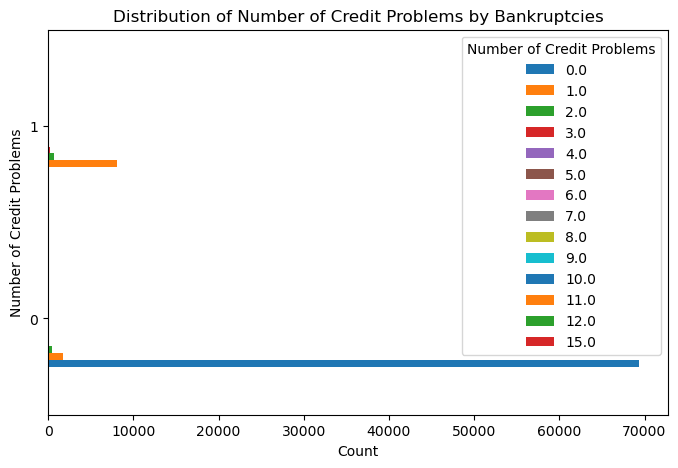

In [5]:
# Create a pivot table
credit_problems = pd.crosstab(index=loan_data['Bankruptcies'], columns=loan_data['Number of Credit Problems'])

# Plot the horizontal bar chart
credit_problems.plot(kind='barh', figsize=(8, 5))

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Number of Credit Problems')
plt.title('Distribution of Number of Credit Problems by Bankruptcies')

# Show the plot
plt.show()

# Current Credit Balance, Monthly Debt and Bankruptcies

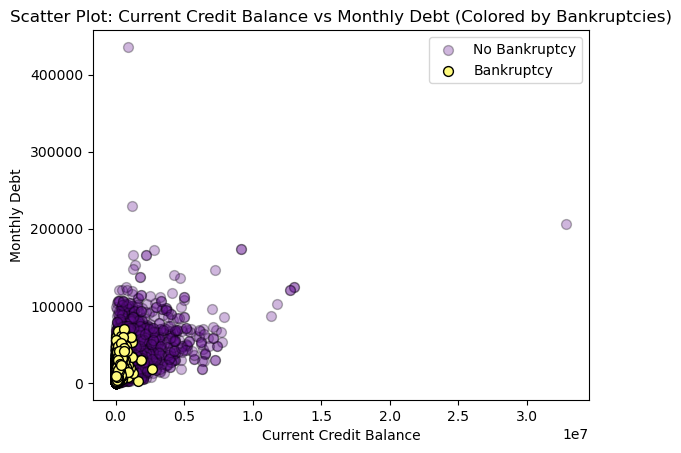

In [6]:
# Create separate DataFrames for Bankruptcies 0 and 1
bankruptcies_0 = loan_data[loan_data['Bankruptcies'] == 0]
bankruptcies_1 = loan_data[loan_data['Bankruptcies'] == 1]

# Plotting the scatter plot for Bankruptcies 0 with transparency
plt.scatter(x=false_df['Current Credit Balance'], 
            y=false_df['Monthly Debt'], 
            c='#620D91',  # Color for Bankruptcies 0
            edgecolor='black', 
            s=50,
            alpha=0.3,  # Adjust alpha for transparency
            label='No Bankruptcy')

# Plotting the scatter plot for Bankruptcies 1 on top with higher opacity
plt.scatter(x=true_df['Current Credit Balance'], 
            y=true_df['Monthly Debt'], 
            c='#FEFA7D',  # Color for Bankruptcies 1
            edgecolor='black', 
            s=50,
            alpha=1,  # Higher alpha for less transparency
            label='Bankruptcy')

# Adding labels and title
plt.xlabel('Current Credit Balance')
plt.ylabel('Monthly Debt')
plt.title('Scatter Plot: Current Credit Balance vs Monthly Debt (Colored by Bankruptcies)')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Years of Credit History vs. Bankruptcies

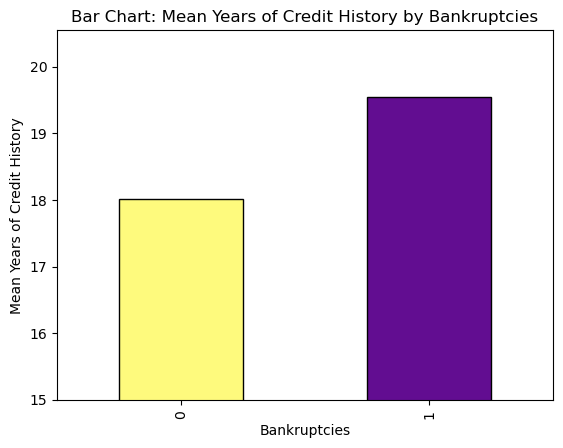

In [7]:
# Grouping by 'Bankruptcies' and calculating the mean of 'Years of Credit History'
grouped_data = loan_data.groupby('Bankruptcies')['Years of Credit History'].mean()

# Plotting the bar chart
ax = grouped_data.plot(kind='bar', color=['#FEFA7D', '#620D91'], edgecolor='black')

# Adding labels and title
plt.xlabel('Bankruptcies')
plt.ylabel('Mean Years of Credit History')
plt.title('Bar Chart: Mean Years of Credit History by Bankruptcies')

# Setting y-axis starting point to 10
plt.ylim(15, max(grouped_data) + 1)  # Adjust the upper limit as needed

# Display the plot
plt.show()

# Annual Income vs. Bankruptcies

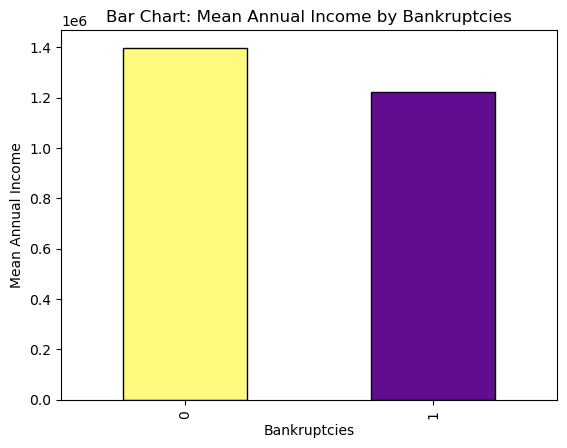

In [8]:
# Grouping by 'Bankruptcies' and calculating the mean of 'Annual Income' for each category
grouped_data = loan_data.groupby('Bankruptcies')['Annual Income'].mean()

# Plotting the bar chart
grouped_data.plot(kind='bar', color=['#FEFA7D', '#620D91'], edgecolor='black')

# Adding labels and title
plt.xlabel('Bankruptcies')
plt.ylabel('Mean Annual Income')
plt.title('Bar Chart: Mean Annual Income by Bankruptcies')

# Display the plot
plt.show()

#  Home Ownship, Term and Bankruptices

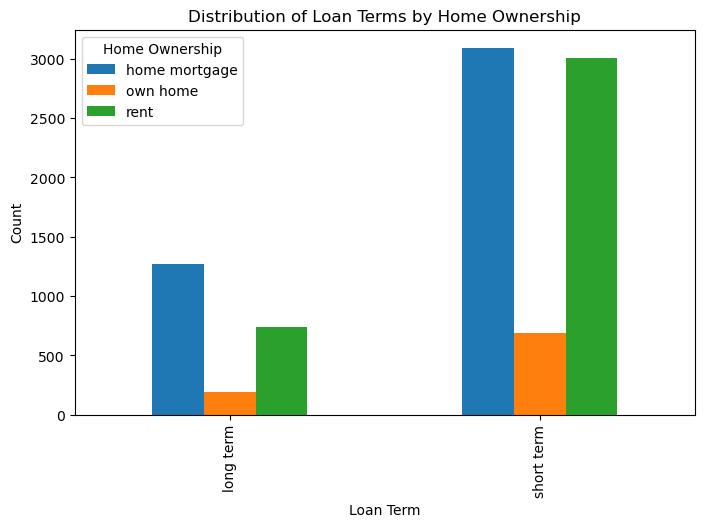

In [9]:
# Make a bar chart when Bankruptices == 1
term_df = true_df[['Home Ownership', 'Term']]

# Create a pivot table
pivot_table_true = pd.crosstab(index=term_df['Term'], columns=term_df['Home Ownership'])

# Plot the bar chart
pivot_table_true.plot(kind='bar', figsize=(8, 5))

# Set labels and title
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms by Home Ownership')

# Show the plot
plt.show()

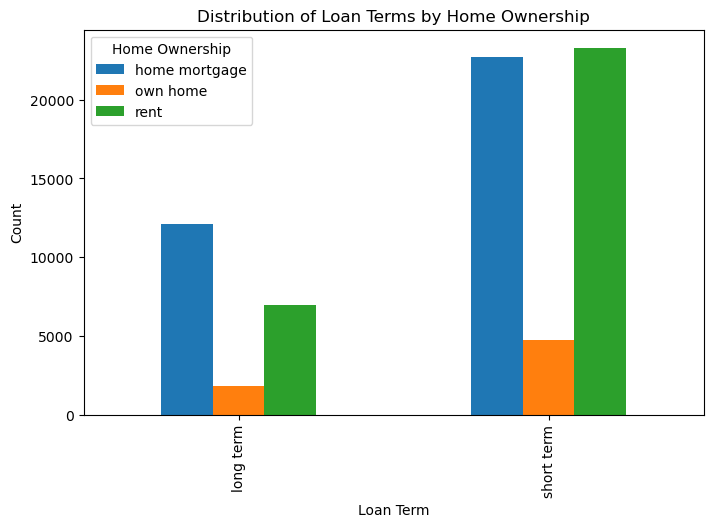

In [10]:
# Make a bar chart when Bankruptices == 0
term_df = false_df[['Home Ownership', 'Term']]

# Create a pivot table
pivot_table_true = pd.crosstab(index=term_df['Term'], columns=term_df['Home Ownership'])

# Plot the bar chart
pivot_table_true.plot(kind='bar', figsize=(8, 5))

# Set labels and title
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms by Home Ownership')

# Show the plot
plt.show()

# Correlation Matrix

In [11]:
# Specify the path to CSV file
csv_file_path = '../Resources/Clean_train_scaled.csv'

# Read the CSV file into a DataFrame
loan_corr = pd.read_csv(csv_file_path)

#Print size of data set
print(loan_corr.shape)

# Display the DataFrame
loan_corr.head(5)

(65072, 15)


,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent,Bankrupt
0,-0.403050,-0.248996,-0.195065,-1.088060,-0.139697,-1.023574,1.699378,-0.175312,-0.046075,0,1,1,0,0,1
1,-0.405859,-0.240861,-0.528623,-0.799685,-0.881886,-0.426898,-0.348918,-0.101568,-0.050396,0,1,0,1,0,0
2,-0.409913,4.212629,-0.445444,-0.176207,-0.125424,-1.023574,-0.348918,-0.209072,-0.067003,1,0,0,1,0,0
3,-0.400080,-0.270013,1.092393,0.011228,0.631038,-1.421359,-0.348918,0.372367,-0.026019,0,1,1,0,0,0
4,-0.409645,-0.228658,0.070678,1.696882,-0.610702,1.760918,-0.348918,0.981391,0.041627,0,1,1,0,0,1


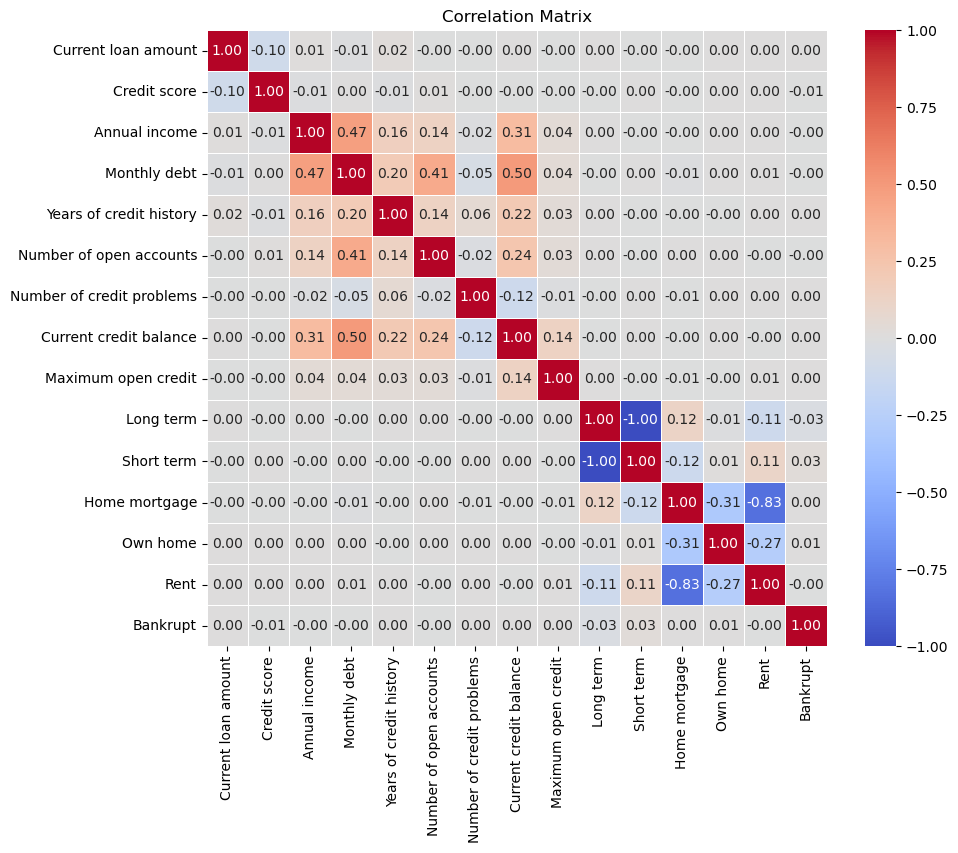

Correlation with Loan_Status:
 Bankrupt                     1.000000
Short term                   0.030517
Own home                     0.006031
Years of credit history      0.002804
Maximum open credit          0.002187
Current loan amount          0.002081
Number of credit problems    0.001503
Current credit balance       0.001304
Home mortgage                0.000775
Number of open accounts     -0.000862
Monthly debt                -0.002774
Annual income               -0.003789
Rent                        -0.004327
Credit score                -0.005294
Long term                   -0.030517
Name: Bankrupt, dtype: float64


In [12]:
# Calculate correlations
correlation_matrix = loan_corr.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Extract correlation values with the target variable (Loan_Status)
correlation_with_target = correlation_matrix['Bankrupt'].sort_values(ascending=False)

# Print correlation values
print("Correlation with Loan_Status:\n", correlation_with_target)